In [1]:
import requests
import os # Interoperable file paths
import pathlib  # Work with file and directory paths
import re # Extract metadata from file names
import zipfile # Work with zip files

from glob import glob # Find files by pattern
from io import BytesIO # Stream binary (zip) files

import geopandas as gpd # Work with geospatial data
import rasterio # Read, write, and manipulate raster datasets
import rasterio.mask # Selectively extract portions of a raster dataset 
import subprocess

In [2]:
# Define and create the project data directories
data_dir = os.path.join(
    pathlib.Path.home(),
    'GitHub',
    'habitat_project',
)
os.makedirs(data_dir, exist_ok=True)

<Axes: >

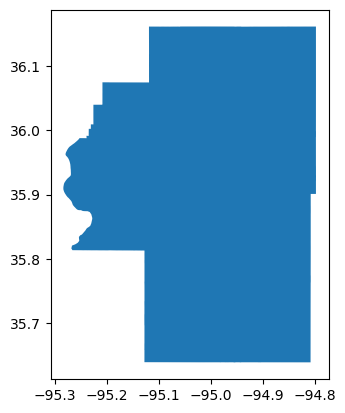

In [3]:
# Define the download path (replace with your desired location)
download_path = "\GitHubr\ivercane_data"

# Define the URL of the shapefile
url = "https://www2.census.gov/geo/tiger/TIGER2023/COUNTY/tl_2023_us_county.zip"

# Download the shapefile
response = requests.get(url)
response.raise_for_status()

with open("tl_2023_us_county.zip", "wb") as f:
    f.write(response.content)
# Extract the shapefile
with zipfile.ZipFile("tl_2023_us_county.zip", "r") as zip_ref:
    zip_ref.extractall()

# Load the shapefile into a GeoDataFrame
county_data = gpd.read_file("tl_2023_us_county.shp")

# Filter for a specific counties 
cherokee_county = county_data[(county_data['STATEFP'] == '40') & (county_data['COUNTYFP'] == '021')]
jackson_county = county_data[(county_data['STATEFP'] == '37') & (county_data['COUNTYFP'] == '099')]

# Plot the shapefile
cherokee_county.plot()

<Axes: >

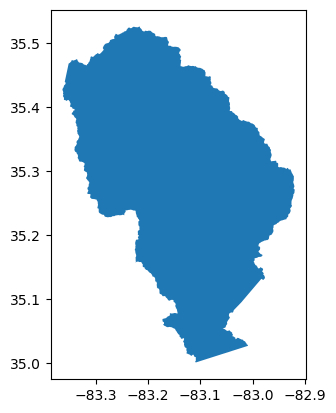

In [4]:
# Plot the shapefile
jackson_county.plot()

In [5]:
%store cherokee_county
%store jackson_county

Stored 'cherokee_county' (GeoDataFrame)
Stored 'jackson_county' (GeoDataFrame)
